In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

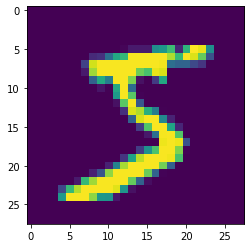

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
x_train.max()

255

In [6]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [7]:
x_train_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## How layers work

In [8]:
dense_layer = keras.layers.Dense(10, input_shape = (1, 784))

flatten_layer = keras.layers.Flatten(input_shape = (28, 28))

In [9]:
#output of layer is flattened version of 28X28 pixel photos = 784
result = flatten_layer(x_train[0:1])
result.shape

TensorShape([1, 784])

In [10]:
#output of one layer is input to another 
dense_layer(result)
# we get a layer of 10 outputs

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[-140.56648 ,   84.00129 , -109.13547 ,   97.19497 ,   15.611649,
         -37.114002,  -86.97856 ,  -62.503597,  172.44131 ,   68.17157 ]],
      dtype=float32)>

### Using a model with only one layer (output layer) and original data

In [11]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(10, activation= 'sigmoid')
])

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 17.8024 - accuracy: 0.7703
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.0639 - accuracy: 0.8776
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.9088 - accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3603 - accuracy: 0.8846
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4245 - accuracy: 0.8863: 0s - los


In [14]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 6.8961 - accuracy: 0.8758


[6.89614200592041, 0.8758000135421753]

In [15]:
pred = np.array([np.argmax(i) for i in model.predict(x_test[:10])])
print(pred) 
print(y_test[:10])

[3 0 1 0 0 1 4 1 4 4]
[7 2 1 0 4 1 4 9 5 9]


somewhat accurate, but not satisfying

## Now we will add a hidden layer to the model

In [16]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [17]:
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [18]:
model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 7.5348 - accuracy: 0.8180
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4008 - accuracy: 0.9058
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2934 - accuracy: 0.9270
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2418 - accuracy: 0.9374
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2314 - accuracy: 0.9404


In [19]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2837 - accuracy: 0.9304


[0.28371766209602356, 0.930400013923645]

In [20]:
pred = np.array([np.argmax(i) for i in model2.predict(x_test[:10])])
print(pred) 
print(y_test[:10])

[7 0 1 0 9 1 3 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


## Using scaled data this time

In [21]:
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [22]:
model3.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [23]:
model3.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4350 - accuracy: 0.8794
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1277 - accuracy: 0.9627
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0771 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0562 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0441 - accuracy: 0.9868


In [24]:
model3.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0734 - accuracy: 0.9777


[0.07335937023162842, 0.9776999950408936]

In [25]:
pred = np.array([np.argmax(i) for i in model3.predict(x_test_scaled[:10])])
print(pred) 
print(y_test[:10])

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


#### much more accurate

## Let's use another hidden layer

In [26]:
model4 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [27]:
model4.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [28]:
model4.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3268 - accuracy: 0.9009
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0830 - accuracy: 0.9734
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0518 - accuracy: 0.9837
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0388 - accuracy: 0.9879
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0311 - accuracy: 0.9896


In [29]:
model4.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9790


[0.07518751174211502, 0.9789999723434448]

#### we see a slight improvement in accuracy

### We will use a correlation matrix to get the info about true and false values in model

In [30]:
y_predicted_labels = [np.argmax(i) for i in model4.predict(x_test_scaled)]

Text(69.0, 0.5, 'true')

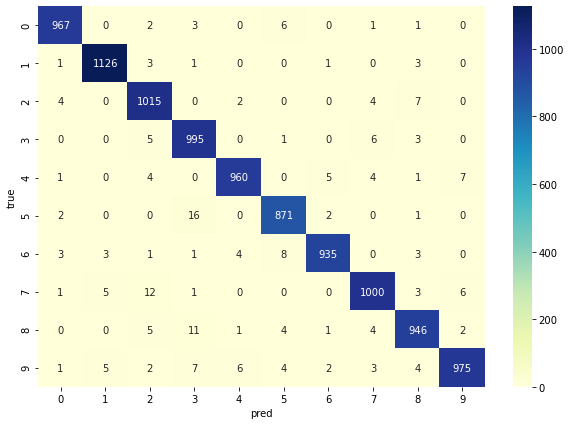

In [31]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

import seaborn as sns
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot = True, fmt = 'd', cmap="YlGnBu")
plt.xlabel("pred")
plt.ylabel('true')

### we see the model sometimes(less than 1%chance) confuses 2 with 7 (which is permissible i guess)

so our model is nearly perfect 

#### We notice that model performs better on training than on test. This might be because of over fitting

## Let's use a Dropout layer

In [32]:
model5 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(500, activation='relu'),
    keras.layers.Dense(120, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [33]:
model5.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [34]:
model5.fit(x_train_scaled, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3883 - accuracy: 0.8789
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1033 - accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0763 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0625 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0511 - accuracy: 0.9839


In [35]:
model5.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0676 - accuracy: 0.9785


[0.06755315512418747, 0.9785000085830688]

### We noticed no promising change in the accuracies 